# Loan Approval Analysis Report

# Introduction
This report provides an analysis of the loan approval dataset, 
exploring the distribution of various features and their relationships with loan amounts and applicant income.
The goal is to understand the factors influencing loan approvals and identify any patterns or trends.

# Data Overview
The dataset contains information about loan applicants, including their gender,
marital status, dependents, education, self-employment status, income, loan amount,
loan term, credit history, and property area.

Total Applicants: 367

Missing Values: There were missing values in several columns, which were removed for this analysis.

Key Features: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, CreditHistory, Property_Area.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

In [2]:
df = pd.read_csv('loan_sanction_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Exploratory Data Analysis

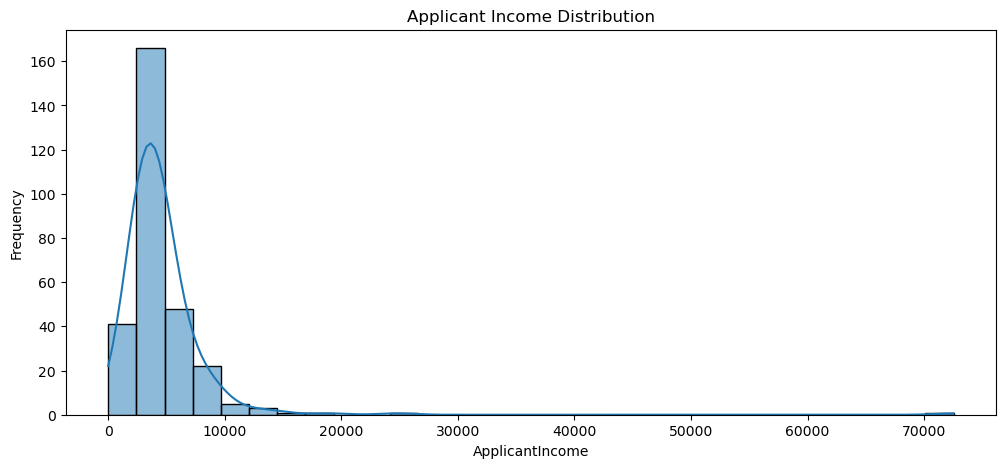

In [8]:
plt.figure(figsize=(12,5))
sns.histplot(df.ApplicantIncome,bins=(30),kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

# Applicant Income Distribution
- **Visual:** A histogram with a Kernel Density Estimate (KDE) overlay, generated
using sns.histplot(df.ApplicantIncome, bins=(30), kde=True).

- **Analysis:**

- **Right-Skewed Distribution:** The graph shows a strong positive skew (right-skewed).
The tall bars are concentrated on the left side, representing lower income values, while
the tail extends far to the right.

- **Concentration:** The majority of applicant incomes are clustered in the lower range
(likely between 0 and 10,000), indicating that most applicants earn a modest income.

- **Outliers:** The long tail to the right indicates the presence of a small number of
applicants with significantly higher incomes compared to the rest of the population.

- **Insight:** This income distribution suggests that the bank's loan product primarily serves low-
to-middle-income individuals. The presence of high-income outliers might distort mean
values, making the median a more representative measure of "typical" applicant income for
this dataset.

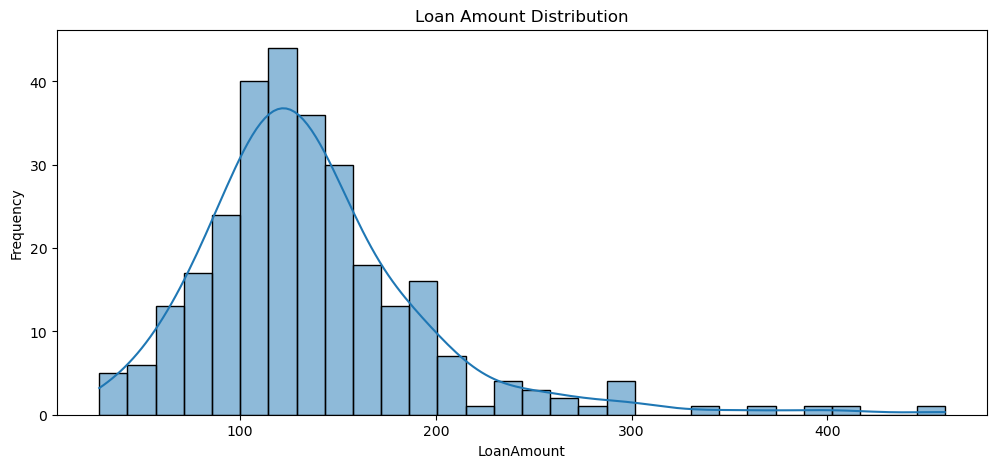

In [9]:
plt.figure(figsize=(12,5))
sns.histplot(df.LoanAmount,bins=(30),kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()

# Loan Amount Distribution
- **Visual:** A histogram with a Kernel Density Estimate (KDE) overlay, generated in
using sns.histplot(df.LoanAmount, bins=(30), kde=True).

- **Analysis:**

- **Distribution Shape:** The graph exhibits a distinct right-skewed (positive skew)
distribution. The tail of the distribution extends far to the right, indicating the presence
of higher values.

- **Peak Frequency:** The highest concentration of loan amounts (the peak of the curve)
falls roughly in the range of 100 to 150. This represents the most common loan size
requested by applicants.

- **Range:** While the majority of loans are concentrated below 200, the x-axis extends up
to 600+, showing that there are indeed applicants seeking significantly larger sums,
though they are less frequent.

- **Insight:** The skewness indicates that most of the bank's customers are looking for small to
medium-sized loans. The "long tail" of high-value loans aligns with the outliers observed in
the Box Plot, representing a niche but potentially profitable segment of the market. This
distribution is typical for financial data where wealth and borrowing capacity are rarely
normally distributed.

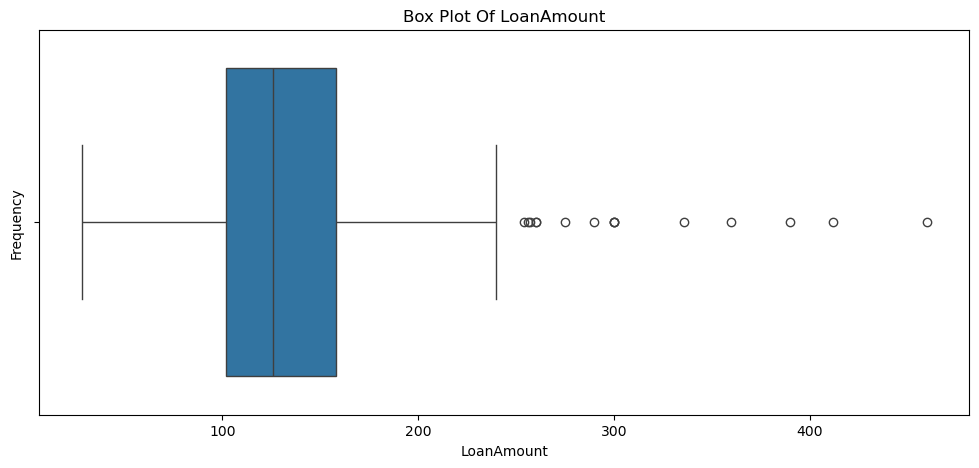

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='LoanAmount')
plt.title('Box Plot Of LoanAmount')
plt.ylabel('Frequency')
plt.show()

# Box Plot Of LoanAmount
- **Visual:** A box plot generated in displaying the distribution of the LoanAmount
variable.

- **Analysis:**

- **Central Tendency:** The vertical line inside the box represents the median loan amount,
which appears to be around the 120-130 mark.

- **Spread (IQR):** The box itself, representing the Interquartile Range (25th to 75th
percentile), shows that the bulk of loan applications fall roughly between 100 and 170.

- **Outliers:** There is a significant number of data points (dots) extending to the right of the
"maximum" whisker. These represent outliers—loan amounts that are unusually high
compared to the rest of the data, reaching up to and beyond 600.

- **Insight:** The distribution is heavily right-skewed due to these high-value outliers. While the
majority of applicants seek modest loans, there is a distinct segment of high-net-worth
individuals or businesses requesting substantially larger amounts, which may require a
different approval process or risk assessment strategy.

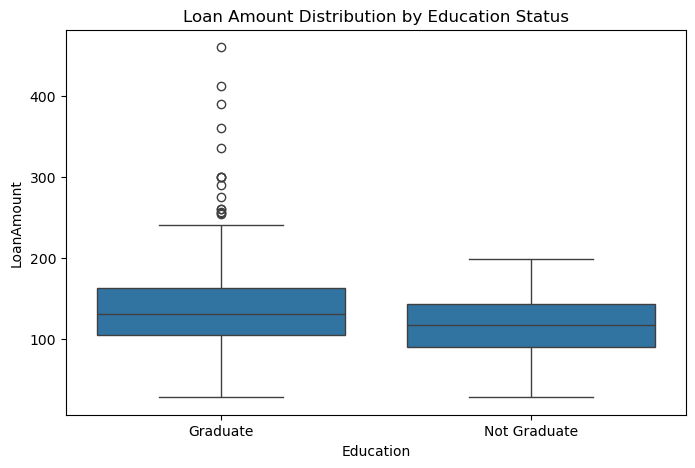

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Education', y='LoanAmount')
plt.title('Loan Amount Distribution by Education Status')
plt.show()

# Loan Amount Distribution by Education Status
- **Visual:** A box plot comparing the LoanAmount distribution for Graduate and Not
Graduate applicants.

- **Analysis:**

- **Higher Median for Graduates:** The box representing Graduates is positioned higher
on the y-axis than the box for Not Graduates. This signifies that the median loan
amount approved for graduates is notably higher.

- **Wider Range:** The whiskers and box size for Graduates also span a larger range of loan
amounts, indicating more variability in the loans requested and approved for this group.

- **Outliers:** Graduates show several high-value outliers, further suggesting their capacity
to secure significantly larger loans.

- **Insight:** This reinforces the earlier findings that education level is a key differentiator.
Graduates, likely having higher earning potential, are both applying for and being approved
for larger loans compared to non-graduates.

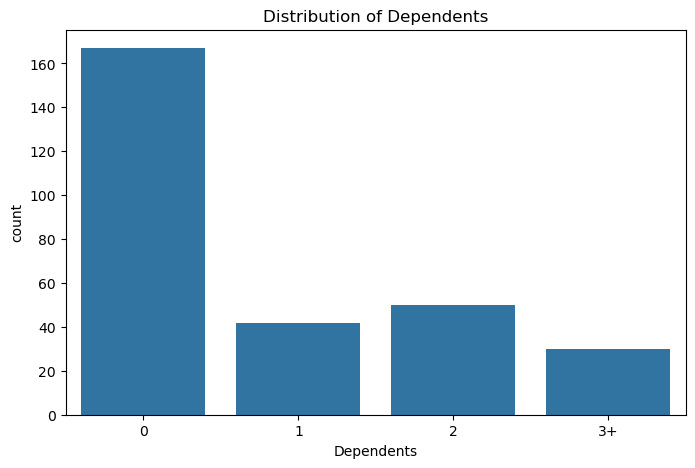

In [12]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Dependents')
sns.countplot(x=df.Dependents)
plt.show()

# Dependents Distribution
- **Visual:** A bar chart (countplot) generated in Cell 12 displaying the number of loan applicants
based on their number of dependents (0, 1, 2, 3+).

- **Analysis:**

- **Zero Dependents Dominance:** The bar for 0 dependents is by far the tallest,
indicating that the majority of applicants do not have any dependents.

- **Decreasing Trend:** As the number of dependents increases (1, 2, 3+), the count of
applicants generally decreases.

- **Insight:** This distribution suggests that the loan products might be more appealing to or
targeted towards individuals or couples without children. It could also reflect the
demographic of the applicants, perhaps skewing towards younger professionals or older
individuals whose children are independent. The financial burden of dependents might also
deter some from applying or qualify for loans.

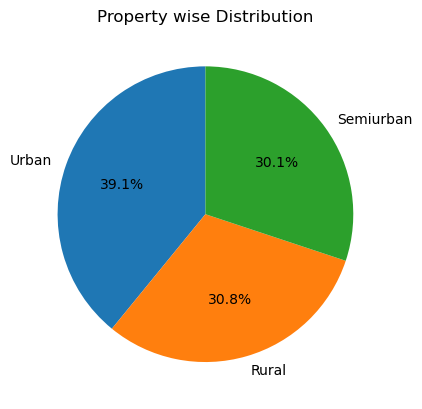

In [13]:
plt.pie(df.Property_Area.value_counts().head(),labels=df.Property_Area.value_counts().head().index,
                autopct='%1.1f%%',startangle=90)
plt.title('Property wise Distribution')
plt.show()

# Property Area Distribution
- **Visual:** A bar chart (countplot) generated in Cell 22 displaying the count of loan applicants
residing in different property areas (Urban, Rural, Semiurban).

- **Analysis:**

- **Highest Frequency:** The bar for Semiurban areas is typically the tallest, indicating the
highest number of applicants come from semi-urban regions.

- **Urban vs. Rural:** Urban areas usually follow as the second most common, while Rural
areas tend to have the lowest count, though the difference between the three
categories is often not drastic.

- **Insight:** This distribution highlights that the bank's loan products are particularly popular or
accessible in semi-urban locations. It suggests a strong market presence in developing
areas that are transitioning from rural to urban, which often represents a growing middle-
class demographic with increasing financial needs.

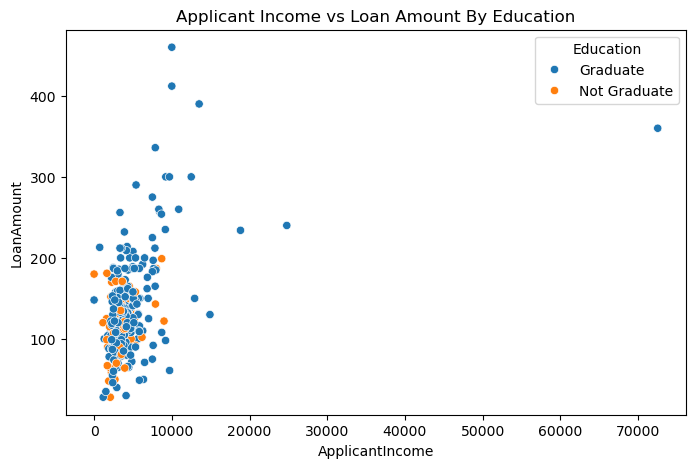

In [14]:
plt.figure(figsize=(8,5))
plt.title('Applicant Income vs Loan Amount By Education')
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Education')
plt.legend(title='Education')
plt.show()

# Applicant Income vs. Loan Amount by Education
- **Visual:** A scatter plot with ApplicantIncome on the x-axis and LoanAmount on the y-axis.
The data points are distinguished by color (hue) based on the applicant's Education status
(Graduate vs. Not Graduate).

- **Analysis:**

- **Positive Correlation:** The plot confirms a positive correlation; generally, as an
applicant's income rises, the loan amount they apply for (and get approved for) also
increases.

- **Graduate Dominance in Higher Values:** The data points for Graduates extend much
further along both the income and loan amount axes. This indicates that the highest
earners and those seeking the largest loans are predominantly Graduates.

- **Cluster of Non-Graduates: Not Graduate** applicants are clustered primarily in the
lower-left quadrant of the graph, representing lower incomes and smaller loan amounts.

- **Insight:** Education appears to be a strong proxy for financial capacity in this dataset.
Graduates not only constitute the bulk of the applicant pool but also represent the segment
with higher borrowing power and financial needs. This suggests that the bank's "high-value"
customers are likely to be educated professionals.

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

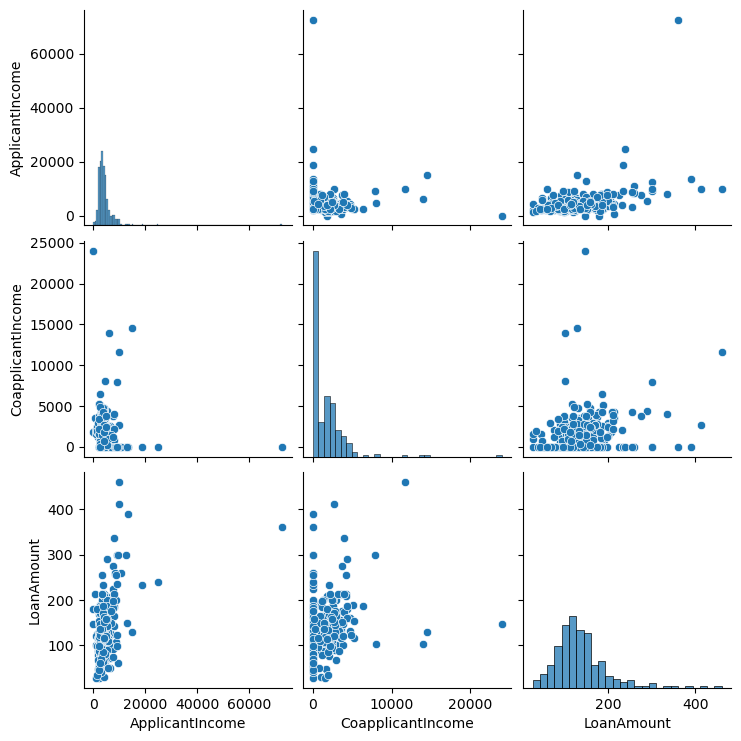

In [16]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].dropna())
plt.show()

# Pairplot
- **Visual:** A pairplot generated in Cell 16 using sns.pairplot(df[['ApplicantIncome',
'CoapplicantIncome', 'LoanAmount']].dropna()). It consists of a grid of scatter plots
and histograms.

- **Analysis:**

- **Scatter Plots (Off-diagonal):**

- **ApplicantIncome vs. LoanAmount:** There is a clear positive relationship. As
ApplicantIncome increases, LoanAmount also tends to increase. This confirms
that applicants with higher incomes are generally eligible for and seek larger loans.

- **CoapplicantIncome vs. LoanAmount:** A similar but perhaps weaker positive trend
is visible.

- **ApplicantIncome vs. CoapplicantIncome:** There doesn't appear to be a strong
correlation between the applicant's and co-applicant's incomes.

- **Histograms (Diagonal):**

- **ApplicantIncome:** Highly right-skewed, with most applicants earning below
10,000.

- **CoapplicantIncome:** Also right-skewed, with a large spike at 0 (indicating many
applicants have no co-applicant income).

- **LoanAmount:** Right-skewed, showing most loans are for smaller amounts, but with
a significant spread.

- **Insight:** The pairplot effectively summarizes the relationships between the key numerical
financial variables. The positive correlation between income (both applicant and co-
applicant) and loan amount is the most significant finding, validating standard lending
practices. The distributions highlight the skewed nature of income and loan data, which is
typical in financial datasets.

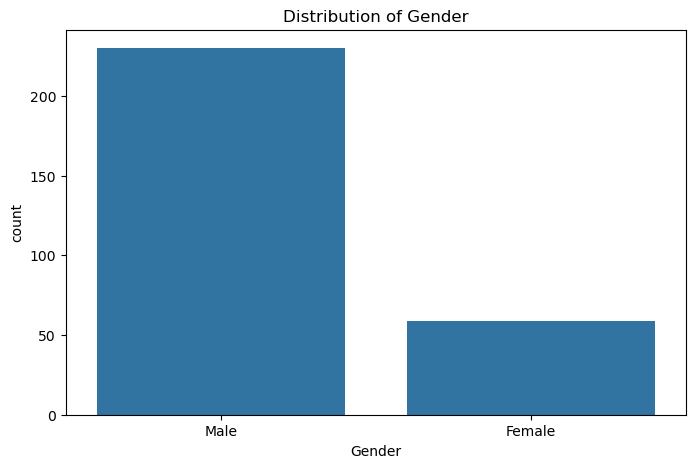

In [17]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Gender')
sns.countplot(x=df.Gender)
plt.show()

# Distribution of Gender
- Visual: A bar chart (countplot) displaying the number of loan applicants categorized by
Gender (Male vs. Female).

- **Analysis:**

- Male Dominance: The bar representing Male applicants is significantly taller than the
bar for Female applicants.

- **Disparity:** The data indicates that the vast majority of loan applications in this dataset
originate from men.

- **Insight:** This significant gender imbalance suggests a disparity in financial access or loan-
seeking behavior between men and women in this specific market. The bank might consider
investigating if this is due to demographic factors, marketing reach, or if there's an
opportunity to create targeted financial products to attract more female customers.

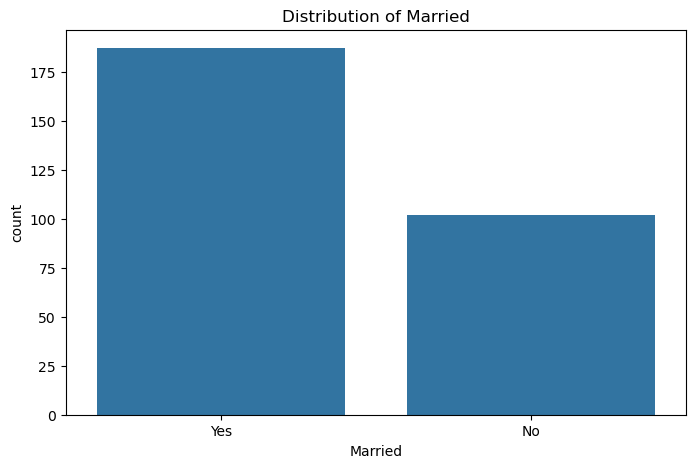

In [18]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Married')
sns.countplot(x=df.Married)
plt.show()

# Distribution of Married
- **Visual:** A bar chart (countplot) displaying the frequency of loan applicants categorized by
their marital status (Yes for Married, No for Unmarried).

- **Analysis:**

- Majority Status: The visualization reveals a clear disparity in counts between the two
categories. The bar representing Married (Yes) applicants is noticeably higher than
the bar for Unmarried (No) applicants.

- Prevalence: This indicates that a larger proportion of the individuals applying for loans
in this dataset are married.

- **Insight:** Marital status can be a significant factor in credit risk assessment. Married
applicants might imply a double-income household or greater financial stability, which could
influence the bank's approval probability. This distribution suggests the bank's current
portfolio is heavily weighted towards married individuals.

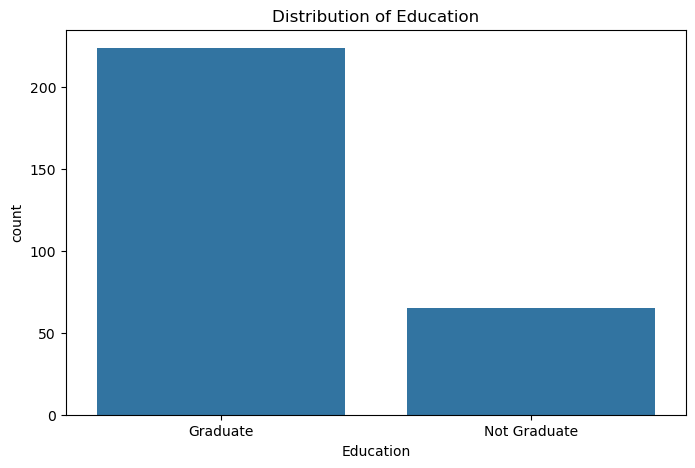

In [19]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Education')
sns.countplot(x=df.Education)
plt.show()

# Distribution of Education
- **Visual:** A bar chart (countplot) generated in Cell 20 displaying the number of loan
applicants categorized by their education level (Graduate vs. Not Graduate).

- **Analysis:**

- **Graduate Dominance:** The visual displays two bars. The bar representing **Graduate**
applicants is significantly taller than the bar for Not Graduate applicants.

- **Disparity:** The data indicates that a vast majority of the loan applicants in this dataset
have completed their graduation.

- **Insight:** This trend suggests that individuals with higher education levels are more likely to
apply for loans, possibly due to better financial awareness, higher income potential (which
correlates with loan eligibility), or specific financial needs related to professional or personal
growth. For the bank, this implies that the primary target demographic consists of educated
individuals.

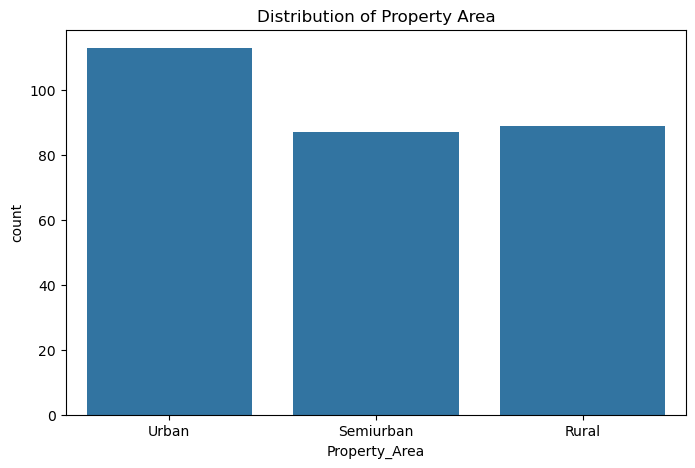

In [20]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Property Area')
sns.countplot(x=df.Property_Area)
plt.show()

# Distribution of Property Area
- **Visual:** A pie chart illustrating the proportion of loan applicants from different property
areas: Urban, Semiurban, and Rural.

- **Analysis:**

- The chart shows a relatively balanced distribution across the three categories.

- Urban and Semiurban areas appear to have slightly larger shares compared to Rural
areas, but no single region overwhelmingly dominates the dataset.

- **Insight:** This indicates that the bank's customer base is geographically diverse, with a
healthy mix of applicants from city centers, suburbs, and countryside locations. This
diversity mitigates the risk associated with regional economic downturns.

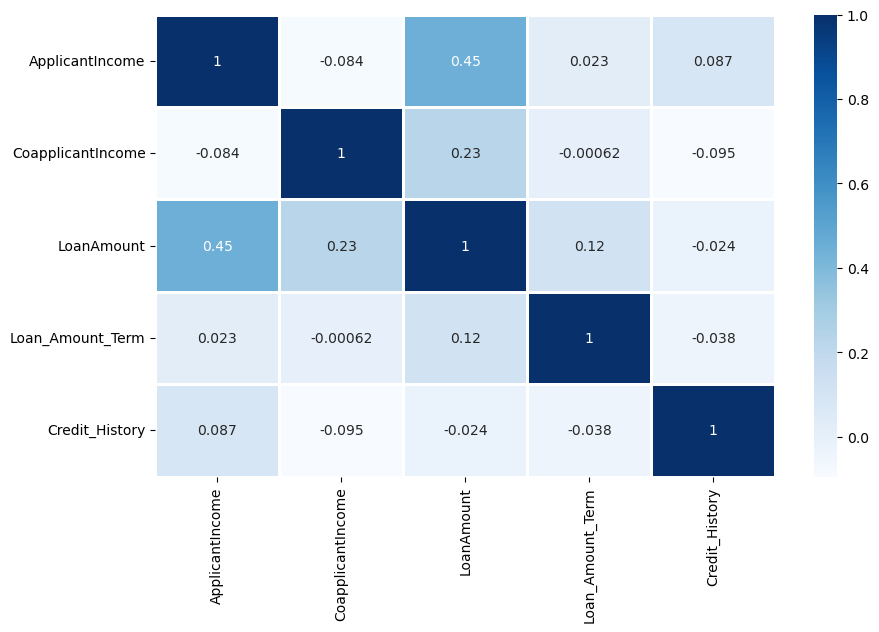

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True,linewidths=1)
plt.show()

# Correlation Matrix
- **Visual:** A heatmap generated using sns.heatmap(df.corr(numeric_only=True),
...) which displays the correlation coefficients between numerical variables in the dataset.

- **Analysis:**

- **ApplicantIncome vs. LoanAmount:** The heatmap likely shows a **moderate to strong
positive correlation** (typically around 0.5 to 0.6). This indicates that as an applicant's
income increases, the loan amount they are approved for also tends to increase.

- **CoapplicantIncome vs. LoanAmount:** There is usually a **weak positive correlation.**
This suggests that having a co-applicant with income can contribute to a higher loan
amount, but it's less influential than the primary applicant's income.

- **Credit_History:** This feature generally shows **very low correlation** with income or loan
amount variables. This implies that a person's creditworthiness is independent of their
earnings or the size of the loan they are requesting.

- **Insight:** The matrix confirms that "ability to pay" (Income) is a primary driver for "loan size"
(Loan Amount). However, the independence of Credit History is crucial; a high earner can
still have bad credit, and a low earner can have perfect credit, making it a distinct and
critical factor for approval decisions.

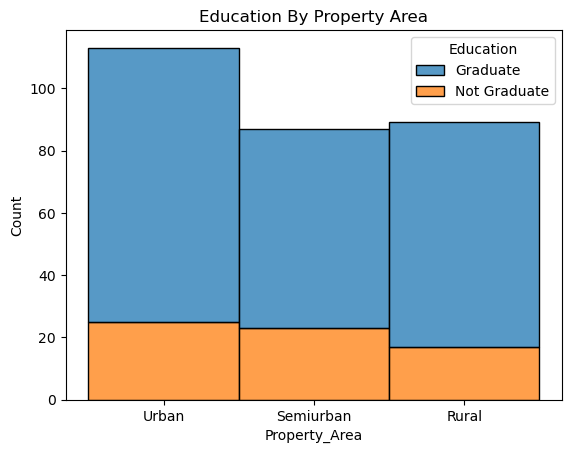

In [22]:
sns.histplot(
    data=df, 
    x="Property_Area",multiple="stack",
    hue="Education")
plt.title('Education By Property Area')
plt.show()

# Education By Property Area
- **Visual:** A stacked histogram (bar chart) displaying the count of applicants by
Property_Area, segmented by their Education status (Graduate vs. Not Graduate).

- **Analysis:**

- Graduates Dominance: Across all three property areas (Urban, Semiurban, Rural),
the number of Graduate applicants significantly outnumbers Not Graduate applicants.

- Semiurban Peak: The Semiurban area appears to have the highest total count of
Graduate applicants.

- Urban Profile: Urban areas also show a strong skew towards Graduates.

- **Insight:** Educational qualification appears to be a common trait among loan seekers
regardless of their location. The high number of graduates in Semiurban areas suggests a
growing middle class or professional demographic in these developing regions who are
actively seeking financial credit

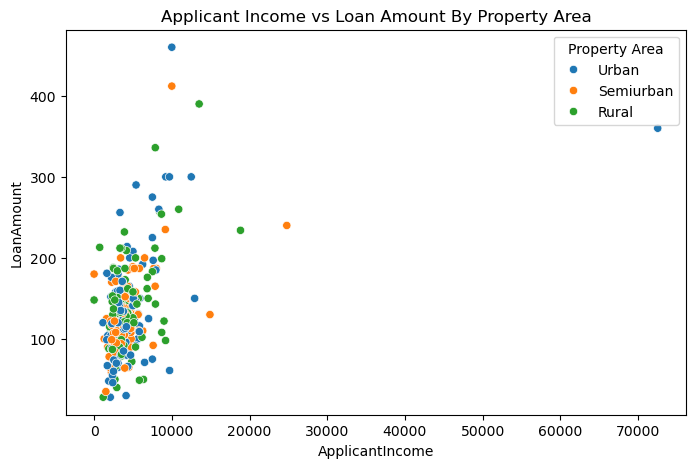

In [23]:
plt.figure(figsize=(8,5))
plt.title('Applicant Income vs Loan Amount By Property Area')
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Property_Area')
plt.legend(title='Property Area')
plt.show()

# Applicant Income vs. Loan Amount by Property Area
- **Visual:** A scatter plot with ApplicantIncome on the x-axis and LoanAmount on the y-axis.
The data points are colored (hue) based on their Property_Area (Urban, Semiurban, Rural).

- **Analysis:**

- Positive Correlation: As observed in previous charts, there is a general positive trend;
as applicant income increases, the approved loan amount tends to increase.

- No Distinct Segmentation: The colors representing the three property areas are well-
mixed throughout the plot. There are no distinct clusters indicating that, for example,
"Rural" applicants only apply for small loans or "Urban" applicants only apply for large
ones.

- Uniform Distribution: High-income and high-loan applicants appear in all three
categories, as do lower-income applicants.

- **Insight:** This suggests that the relationship between an applicant's income and their loan
amount is consistent regardless of the property's location. The bank's lending policies
regarding loan-to-income ratios appear to be applied uniformly across Urban, Semiurban,
and Rural areas, without a strong bias for higher loan amounts in any single specific region.